# Create Intermediate Raster Result

In [23]:
from datetime import datetime

import geoengine as ge
from geoengine import colorizer
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


## Initialize Geo Engine

In [24]:
ge.initialize("http://localhost:3030")

In [25]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          083389ae-9e30-4e47-846e-db1657418a21

## Define workflow of MODIS NDVI raster

In [26]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

In [27]:

# this method is only used to display the results a bit more concise.
def plot_geoengine_img(colorizer: list):
    time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

    # create horizontal subplots
    fig, axs = plt.subplots(1, len(colorizer), figsize=(10, 5))

    imgs = []
    for col in colorizer:
        img = workflow.wms_get_map_as_image(
        ge.QueryRectangle(
            [-180.0, -90.0, 180.0, 90.0],
            [time, time],
            resolution=(1.8, 1.8)
            ),
            "viridis")

        imgs.append(img)
    
    for (ax, img) in zip(axs, imgs):
        ax.imshow(img)

In [28]:
# create a colorizer instance with default values

# note: you have to specify a min/max range for your colormap calls 
# without passing a default value here
co_no_defaults = colorizer.Colorizer() 

# with default min/max values, 
# you can override the value any time in a call to to_query_string()
co = colorizer.Colorizer(min_max=(0, 255))

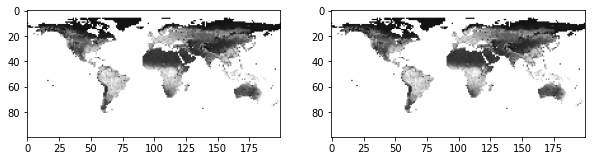

In [29]:
# default maps
colors = [co.to_query_string("magma"), co.to_query_string("viridis")]
plot_geoengine_img(colors)

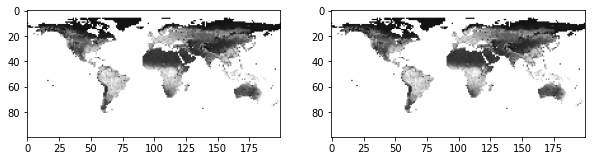

In [30]:
# configure the steps
colors = [co.to_query_string("magma", n_steps=2), co.to_query_string("magma", n_steps=20)]
plot_geoengine_img(colors)

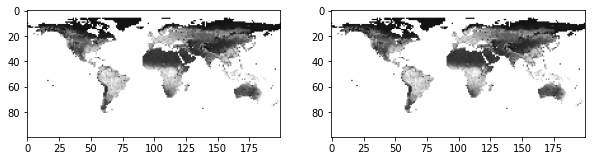

In [31]:
# configure the value range
# note: 1st map shows, that the defaults set earlier are overriden (for that map)
colors = [co.to_query_string("magma", min_max=(50,200)), co.to_query_string("magma")]
plot_geoengine_img(colors)

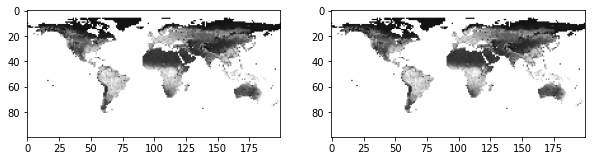

In [32]:
# use custom maps

custom_map = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
colors = [
    co.to_query_string(custom_map), # default
    co.to_query_string(custom_map, n_steps=2, min_max=(50,150)) # with options
    ]
plot_geoengine_img(colors)